In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('TESLA.csv')

In [3]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800
...,...,...,...,...,...,...,...
248,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63615400
249,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900
250,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200
251,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800


In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [7]:
data["Date"].unique()

array(['2021-09-29', '2021-09-30', '2021-10-01', '2021-10-04',
       '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08',
       '2021-10-11', '2021-10-12', '2021-10-13', '2021-10-14',
       '2021-10-15', '2021-10-18', '2021-10-19', '2021-10-20',
       '2021-10-21', '2021-10-22', '2021-10-25', '2021-10-26',
       '2021-10-27', '2021-10-28', '2021-10-29', '2021-11-01',
       '2021-11-02', '2021-11-03', '2021-11-04', '2021-11-05',
       '2021-11-08', '2021-11-09', '2021-11-10', '2021-11-11',
       '2021-11-12', '2021-11-15', '2021-11-16', '2021-11-17',
       '2021-11-18', '2021-11-19', '2021-11-22', '2021-11-23',
       '2021-11-24', '2021-11-26', '2021-11-29', '2021-11-30',
       '2021-12-01', '2021-12-02', '2021-12-03', '2021-12-06',
       '2021-12-07', '2021-12-08', '2021-12-09', '2021-12-10',
       '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16',
       '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
       '2021-12-23', '2021-12-27', '2021-12-28', '2021-

In [8]:
# Check for missing values
missing_values = data.isnull().sum()

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(data)) * 100

# Display the missing data statistics
print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Percentage of Missing Data:
 Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64


In [9]:
data["Date"]=pd.to_datetime(data["Date"])

In [10]:
columns_to_remove = ['Date']
data = data.drop(columns_to_remove, axis=1)

In [11]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
0,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,261.600006,265.769989,258.066681,260.196655,260.196655,55297800


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 12.0 KB


In [13]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,300.136008,307.486021,292.114058,299.709104,299.709104,8.050938e+07
std,46.139272,46.789896,44.685331,45.788283,45.788283,2.546595e+07
min,207.949997,217.973328,206.856674,209.386673,209.386673,3.504270e+07
25%,266.513336,273.166656,260.723328,266.923340,266.923340,6.255570e+07
50%,298.500000,303.709991,289.130005,296.666656,296.666656,7.695630e+07
75%,335.600006,344.950012,327.510010,336.336670,336.336670,9.347310e+07
max,411.470001,414.496674,405.666656,409.970001,409.970001,1.885563e+08


In [14]:
data.describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,253.00,253.00,253.00,253.00,253.00,2.530000e+02
mean,300.14,307.49,292.11,299.71,299.71,8.050938e+07
std,46.14,46.79,44.69,45.79,45.79,2.546595e+07
min,207.95,217.97,206.86,209.39,209.39,3.504270e+07
25%,266.51,273.17,260.72,266.92,266.92,6.255570e+07
50%,298.50,303.71,289.13,296.67,296.67,7.695630e+07
75%,335.60,344.95,327.51,336.34,336.34,9.347310e+07
max,411.47,414.50,405.67,409.97,409.97,1.885563e+08


In [15]:
data_cleaned = data.dropna()

In [16]:
data.describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,253.00,253.00,253.00,253.00,253.00,2.530000e+02
mean,300.14,307.49,292.11,299.71,299.71,8.050938e+07
std,46.14,46.79,44.69,45.79,45.79,2.546595e+07
min,207.95,217.97,206.86,209.39,209.39,3.504270e+07
25%,266.51,273.17,260.72,266.92,266.92,6.255570e+07
50%,298.50,303.71,289.13,296.67,296.67,7.695630e+07
75%,335.60,344.95,327.51,336.34,336.34,9.347310e+07
max,411.47,414.50,405.67,409.97,409.97,1.885563e+08


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


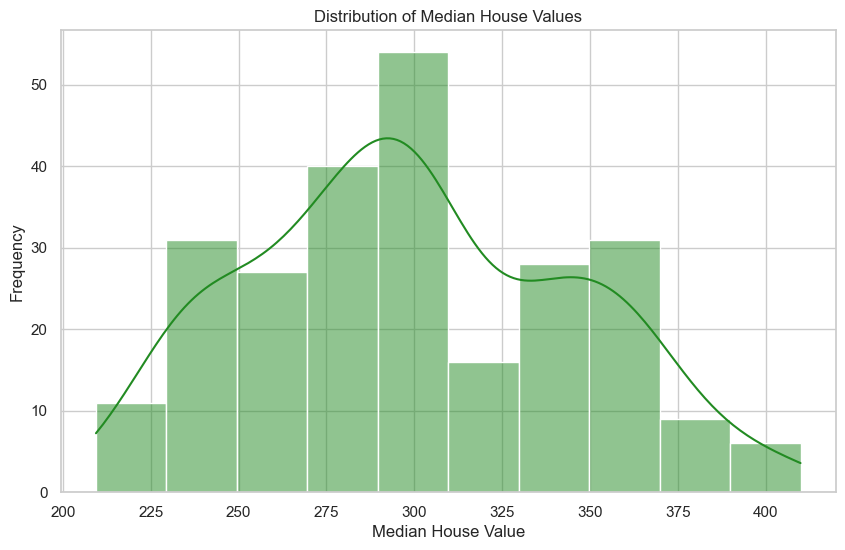

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Close'], color='forestgreen', kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Define your features (independent variables) and target (dependent variable)
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
target = ["Close"]

X = data[features]
y = data[target]


# Split the data into a training set and a testing set
# test_size specifies the proportion of the data to be included in the test split
# random_state ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 202 samples
Test set size: 51 samples


In [19]:
X_train

,Open,High,Low,Adj Close,Volume
203,255.106674,273.266663,254.866669,271.706665,142032300
176,235.156662,239.500000,227.913330,232.229996,97536600
118,291.496674,302.616669,289.130005,301.796661,100414200
197,225.500000,242.059998,225.033340,237.039993,97954500
66,382.583344,400.356659,378.679993,399.926666,103931400
...,...,...,...,...,...
140,343.333344,344.666656,325.083344,325.733337,70711200
81,304.733337,317.086670,301.070007,306.133331,86595900
229,297.429993,302.000000,287.470001,288.089996,57163900
55,331.500000,331.660004,307.283325,308.973328,82771500


In [20]:
X_train_const = sm.add_constant(X_train)
X_train_const

,const,Open,High,Low,Adj Close,Volume
203,1.0,255.106674,273.266663,254.866669,271.706665,142032300
176,1.0,235.156662,239.500000,227.913330,232.229996,97536600
118,1.0,291.496674,302.616669,289.130005,301.796661,100414200
197,1.0,225.500000,242.059998,225.033340,237.039993,97954500
66,1.0,382.583344,400.356659,378.679993,399.926666,103931400
...,...,...,...,...,...,...
140,1.0,343.333344,344.666656,325.083344,325.733337,70711200
81,1.0,304.733337,317.086670,301.070007,306.133331,86595900
229,1.0,297.429993,302.000000,287.470001,288.089996,57163900
55,1.0,331.500000,331.660004,307.283325,308.973328,82771500


In [21]:
# Fit the OLS model
model_fitted = sm.OLS(y_train, X_train_const).fit()

# Printing Summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.618e+22
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        20:34:53   Log-Likelihood:                 3729.2
No. Observations:                 202   AIC:                            -7446.
Df Residuals:                     196   BIC:                            -7427.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.608e-15    1.4e-09   1.15e-06      1.0

In [22]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics
print(f'RMSE on Test Set: {rmse}')

RMSE on Test Set: 1.2585344472030546e-14


In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
model.fit(data[['Open', 'High', 'Low', 'Adj Close',	'Volume']],data['Close'])

LinearRegression()

In [26]:
model.coef_


array([ 1.12626159e-14, -2.34518757e-14,  1.24063461e-14,  1.00000000e+00,
        4.73390822e-16])

In [27]:
model.intercept_

-3.8112204947537975e-08

In [28]:
model.predict([[20.333344,	26.043335,	258.333344,	155.493347,	23868000]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([155.49334697])

In [29]:
print(y_pred)
y_test

[[286.666656]
 [236.473328]
 [298.      ]
 [339.01001 ]
 [270.359985]
 [258.493347]
 [265.116669]
 [224.473328]
 [362.063324]
 [286.323334]
 [288.170013]
 [310.856659]
 [297.149994]
 [260.51001 ]
 [333.036682]
 [307.053345]
 [337.796661]
 [342.320007]
 [286.630005]
 [245.529999]
 [362.706665]
 [274.799988]
 [262.369995]
 [276.366669]
 [379.019989]
 [293.296661]
 [339.476654]
 [354.799988]
 [260.196655]
 [312.470001]
 [275.609985]
 [244.666672]
 [244.543335]
 [300.799988]
 [288.589996]
 [274.420013]
 [274.820007]
 [299.679993]
 [296.666656]
 [364.66333 ]
 [291.920013]
 [289.26001 ]
 [309.070007]
 [292.140015]
 [297.276672]
 [268.209991]
 [268.433319]
 [241.456665]
 [385.623322]
 [331.32666 ]
 [363.946655]]


,Close
94,286.666656
161,236.473328
16,298.000000
51,339.010010
10,270.359985
1,258.493347
113,265.116669
189,224.473328
63,362.063324
111,286.323334


In [30]:
y_pred_train=lr.predict(X_train)
y_pred_train

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[13125.342553  ],
       [11261.98089416],
       [14545.63829458],
       [11489.02041438],
       [19177.5308414 ],
       [13990.54855346],
       [16113.67530508],
       [14637.83900697],
       [14488.524792  ],
       [14828.84785213],
       [13042.73976568],
       [14964.31618773],
       [16895.33354179],
       [13226.1962143 ],
       [14275.33110399],
       [17426.19446943],
       [13995.58302806],
       [17323.13833493],
       [14669.46468789],
       [12616.03694121],
       [15151.54956604],
       [11361.73400289],
       [14293.42498496],
       [12358.31666872],
       [11301.47305094],
       [17255.1678995 ],
       [16253.23460274],
       [14576.31904689],
       [15381.42108755],
       [16269.75544338],
       [11860.96920244],
       [15975.5319608 ],
       [11396.03393718],
       [14013.99089418],
       [16754.20125101],
       [14932.84896225],
       [11444.02205023],
       [11282.43494925],
       [14459.88952101],
       [11435.6831336 ],
